<div style="background-color: #1f407a;padding:1rem;">
<img src="images/ethz_logo.svg" />
</div>
<div style="color:#1f407a;padding:1rem; text-align:center; font-size: 2rem; font-weight: 600;">
401-3901-00L Mathematical Optimization HS2020
</div>
<div style="text-align: center; color:#1f407a">Pascal Lüscher</div>

In [1]:
import pulp as p

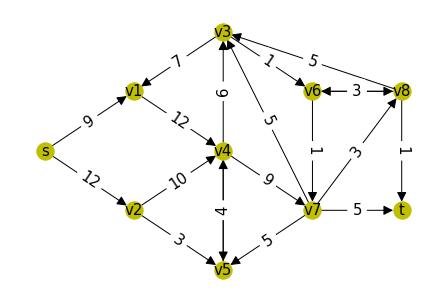

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

# Create the graph
G = nx.DiGraph()
G.add_nodes_from(["s", "t"])
G.add_nodes_from([f"v{i+1}" for i in range(8)])
capacityProp = "cap"

G.add_edges_from([("s", "v1", {capacityProp: 9}), ("s", "v2", {capacityProp: 12}),
                  ("v3", "v1", {capacityProp: 7}), ("v1", "v4", {capacityProp: 12}), ("v2", "v4", {capacityProp: 10}), ("v2", "v5", {capacityProp: 3}),
                  ("v4", "v3", {capacityProp: 6}), ("v4", "v5", {capacityProp: 2}), ("v5", "v4", {capacityProp: 4}),
                  ("v8", "v3", {capacityProp: 5}), ("v3", "v6", {capacityProp: 1}), ("v7", "v3", {capacityProp: 5}), ("v4", "v7", {capacityProp: 9}), ("v7", "v5", {capacityProp: 5}),
                  ("v6", "v7", {capacityProp: 1}),
                  ("v6", "v8", {capacityProp: 5}), ("v8", "v6", {capacityProp: 3}), ("v7", "v8", {capacityProp: 3}), ("v7", "t", {capacityProp: 5}),
                  ("v8", "t", {capacityProp: 1})
                  ])


node_pos = {"s": (0, 3),"v1": (1, 4),"v2": (1, 2), "v3": (2, 5),"v4": (2, 3), "v5":(2,1), "v6":(3,4), "v7":(3,2), "v8":(4,4), "t":(4,2)}

nx.draw(G,node_pos, with_labels=True,font_size=15, arrowsize = 20, node_color = 'y')
nx.draw_networkx_edge_labels(G,pos=node_pos,label_pos=0.5, edge_labels=nx.get_edge_attributes(G, capacityProp),font_size=15)
plt.show()

In [19]:
problem = p.LpProblem("minPath", p.LpMaximize)

variables = {f"d{n}": p.LpVariable(f"d{n}", 0) for n in G.nodes }

problem += variables["ds"] == 0
for e in G.edges:
    problem += variables[f"d{e[1]}"] <= variables[f"d{e[0]}"] + G.get_edge_data(e[0],e[1])[capacityProp]

problem += p.lpSum(variables)

status = problem.solve()
print(f"Solved problem state: {p.LpStatus[status]}")
print(f"Objective: {problem.objective.value()}")
for n in G.nodes:
    G.nodes[n]['d_min'] = variables[f"d{n}"].value()

Solved problem state: Optimal
Objective: 194.0


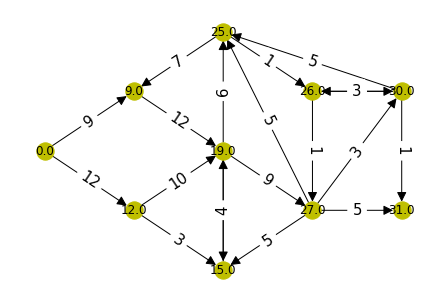

In [22]:
nx.draw(G,node_pos, with_labels=False,font_size=2, arrowsize = 20, node_color = 'y')
nx.draw_networkx_edge_labels(G,pos=node_pos,label_pos=0.5, edge_labels=nx.get_edge_attributes(G, capacityProp),font_size=15)
nx.draw_networkx_labels(G, pos=node_pos,  labels=nx.get_node_attributes(G, "d_min"))
plt.show()
